# EMA Visulation Script VENSIM Model

Date: 28-08-2017

Mark Havelaar
Wouter Jaspers

Subject: Improving Large Intervention Decisions in Infra Asset Management

Simulation:
GENERAL_RoadLockIntervention (Intervention on road and lock)

## Intervention simulation: Simulation of 1000 runs of all 6 models. 
## 'Best' Asset Intervention Policies for Road & Lock. 
## 6 models: City, Harbour, Economy, Area, Road, Lock. 

#1 Loading EMA Workbench & Other Relevant Packages

In [2]:
from __future__ import division


import copy
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np
import datetime
import math
import matplotlib.gridspec as gridspec
import pandas as pd
import tarfile

import seaborn as sns

import scipy.stats.kde as kde

from matplotlib.pyplot import pie
from matplotlib.ticker import FormatStrFormatter, FuncFormatter
from matplotlib.patches import ConnectionPatch
import matplotlib.font_manager as fm

from ema_workbench import (util, TimeSeriesOutcome, perform_experiments, Constant, 
                           RealParameter, ema_logging, ScalarOutcome, load_results)

from ema_workbench.util import ema_logging, debug, info, warning, EMAError

from ema_workbench.analysis.plotting_util import prepare_data, COLOR_LIST, simple_kde, group_density,\
                                                 plot_envelope, simple_density,\
                                                 do_titles, do_ylabels, TIME, ENV_LIN, ENVELOPE, LINES,\
                                                 PATCH, LINE, TIGHT, KDE, BOXPLOT, group_results

from Figures import envelopes, lines, plot_lines_with_envelopes, string_to_upper_case, change_fig_appearance
    
__all__ = ['lines', 'envelopes', 'kde_over_time', 'multiple_densities']

TIME_LABEL = 'Time'

from ema_workbench.analysis.pairs_plotting import pairs_lines, pairs_scatter, pairs_density
import ema_workbench.analysis.plotting_util as plt_util

save = False
fig_size = (10,7)
dpi = 300
%matplotlib inline

#2 Specifying WD + Loading Results from Calculation File

In [3]:
#Working Directory for Loading Results
wd= r'C:\Users\markh\Dropbox\Tu Delft\Afstuderen SD\V - EMA'

#Working Directory for Saving Figures
wd1= r'C:\Users\markh\Dropbox\Tu Delft\Afstuderen SD\V - EMA\Figures'

In [4]:
file_name = wd + '\\GENERAL_1000runs_SimulationFile_RoadLockIntervention.tar.gz'
results = util.load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\markh\Dropbox\Tu Delft\Afstuderen SD\V - EMA\GENERAL_1000runs_SimulationFile_RoadLockIntervention.tar.gz


#3 Getting an overview of the KPIs in the Results File

In [5]:
experiments, outcomes = results

starttime = 2017
keys = outcomes.keys()

all_KPIs = []

for key in sorted(keys):
    print(key)
    all_KPIs.append(key)

Available Area
City Area to Total Area
City Population
Constructed Business
Constructed Houses
Harbour Area to Total Area
Jobs
Local Economic Growth
Local Economy
Lock System IC Factor
MTPA Distributed in Harbour
Road System IC Factor
Sell By Date for the Sewer System
Sell By Date of Door Height
Sell By Date of Lock Remaining Parts Height
Sell By Date of Lock System Policy IC Factor
Sell By Date of the Road System Policy
TIME


#4 Specifying Ylabels for Graphs

In [6]:
ylabels = {}
ylabels['City Area to Total Area'] = 'City Area to Total Area (%)'
ylabels['City Population'] = 'City Population (People)'
ylabels['Constructed Business'] = 'City Businessess (Buildings)'
ylabels['Constructed Houses'] = 'City Houses (Houses)'
ylabels['Harbour Area to Total Area'] = 'Harbour area to Total Area (%)'
ylabels['MTPA Distributed in Harbour'] = 'Harbour Distribution (MTPA/Year)'
ylabels['Local Economic Growth'] = 'Local Economic Growth (%)'
ylabels['Local Economy'] = 'Local Economy (Euros)'
ylabels['Total Constructed area to total area'] = 'Total Constructed Area to Total Area (%)'
ylabels['Lock System IC Factor'] = 'Lock System IC Factor (%)'
ylabels['Sell By Date of Door Height'] = 'Sell By Date (Year)'
ylabels['Sell By Date of Lock Remaining Parts Height'] = 'Sell By Date (Year)'
ylabels['Sell By Date of Lock System Policy IC Factor'] = 'Sell By Date (Year)'
ylabels['Road System IC Factor'] = 'Road System IC Factor (%)'
ylabels['Sell By Date for the Sewer System'] = 'Sell By Date (Year)'
ylabels['Sell By Date of Road System Policy'] = 'Sell By Date (Year)'
ylabels['Jobs'] = 'Jobs (Jobs)'
ylabels['Available Area'] = 'Available Area (ha)'
ylabels['Sell By Date of the Road System Policy'] = 'Sell By Date (Year)'

#5 Specifying Categories Labels per Scenario

In [7]:
#Switch Population
Categories_labels_pop = ['Low Population', 'Medium Population', 'High Population']
#Switch Urbanization
Categories_labels_urb = ['Low Urbanization', 'Medium Urbanization', 'High Urbanization']
#Switch Economy
Categories_labels_eco = ['Low Economic Growth', 'Medium Economic Growth',  'High Economic Growth']
#Switch Climate Scenario
Categories_labels_climate = ['GL Scenario', 'GH Scenario', 'WL Scenario', 'WH Scenario']
#Switch Innovation
Categories_labels_inno = ['Low Innovation', 'Medium Innovation', 'High Innovation']
#Switch Connected and Unconnected
Categories_labels_con = ['Unconnected', 'Connected']
#Switch Building Mode
Categories_labels_mode = ['ReActive', 'ProActive']
#Forecast Time Forecasting Policy
Categories_labels_Ftime = ['No Forecasting', 'Short Period Forecasting', 'Mid Period Forecasting', 'Long Period Forecasting']
#Switch Nature Scenario
Categories_labels_nature = ['No Nature Preservation', 'Nature Preservation']

#6 Drawing KPI Graphs

- Specify Outcome of Interest
- Group_by switch (or not)
- If Grouped_by: Specify Categories_labels
- Set Ax Title: According to KPI
- save figure

## #6 Lines Graphs

## #6.1 City

6.1.1 City Population

Low Urbanization
Medium Urbanization
High Urbanization
City Population


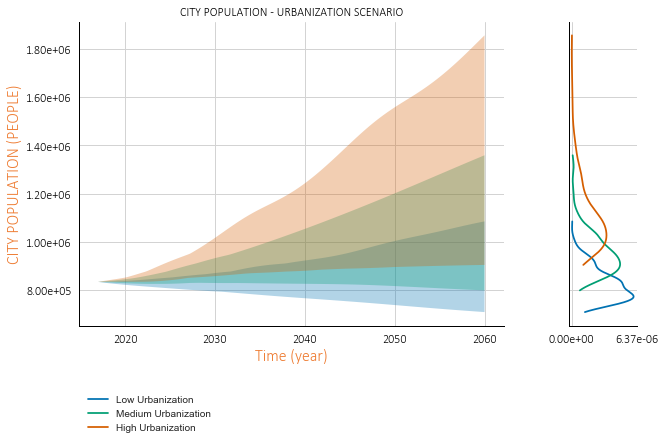

In [9]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'City Population'
fig, axes = envelopes(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Urbanization',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_urb,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('City Population - Urbanization Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_CityPop_Urbanisation_Intervention_0_Envelopes.png', dpi=300)

Low Population
Medium Population
High Population


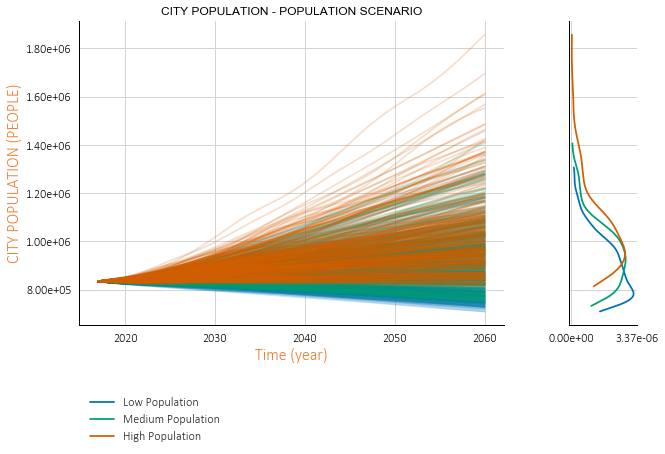

In [32]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'City Population'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Population',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_pop,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('City Population - Population Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_CityPop_Population_Intervention_0_Lines.png', dpi=100)

Low Economic Growth
Medium Economic Growth
High Economic Growth


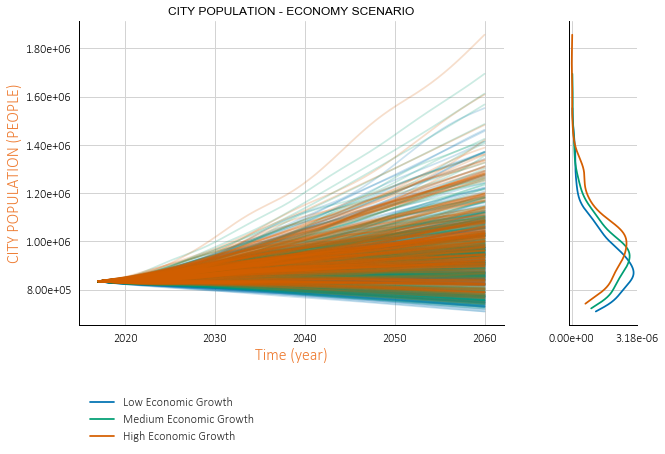

In [33]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'City Population'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Economy',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_eco,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('City Population - Economy Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_CityPop_Economy_Intervention_0_Lines.png', dpi=100)

GL Scenario
GH Scenario
WL Scenario
WH Scenario


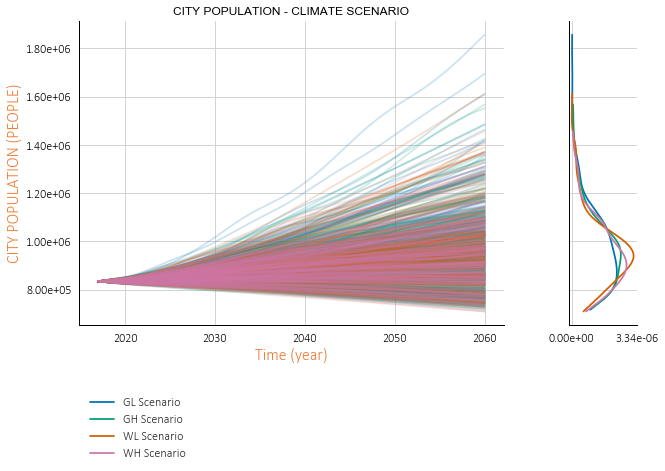

In [34]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'City Population'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Climate Scenario',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_climate,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('City Population - Climate Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_CityPop_Climate_Intervention_0_Lines.png', dpi=100)

6.1.2 Constructed Houses

Low Urbanization
Medium Urbanization
High Urbanization


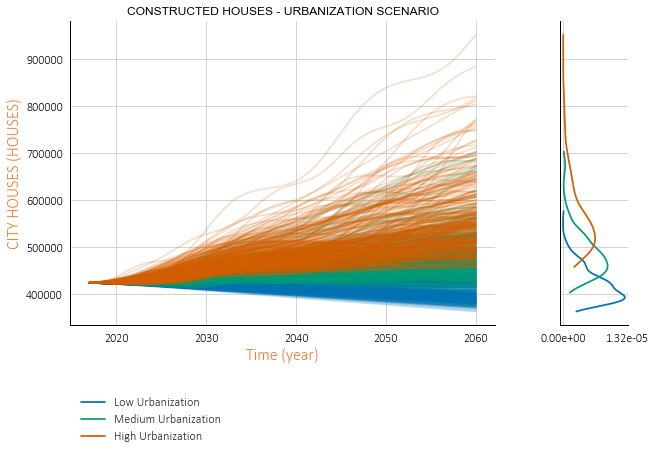

In [35]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Constructed Houses'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Urbanization',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_urb,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Constructed Houses - Urbanization Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_Houses_Urbanisation_Intervention_0_Lines.png', dpi=300)

Low Economic Growth
Medium Economic Growth
High Economic Growth


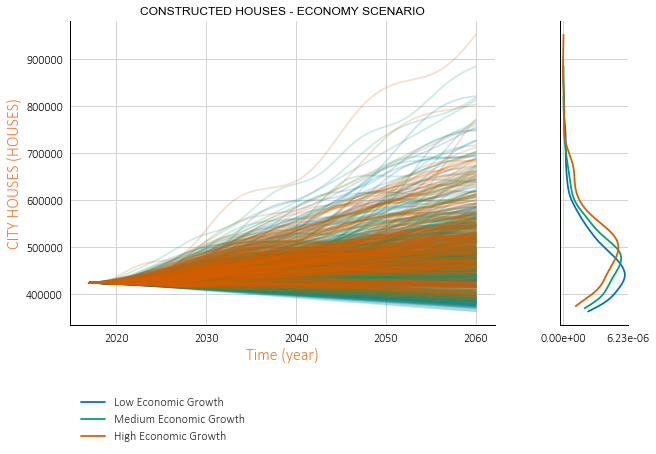

In [36]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Constructed Houses'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Economy',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_eco,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Constructed Houses - Economy Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_Houses_Economy_Intervention_0_Lines.png', dpi=300)

ReActive
ProActive
Constructed Houses


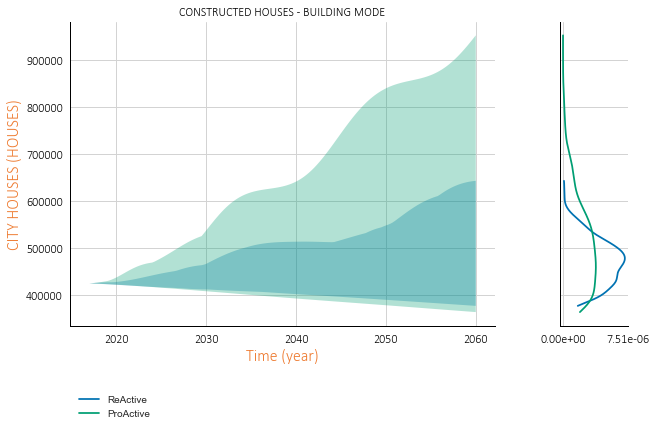

In [37]:
sns.set_style("whitegrid", {"axes.edgecolor": 'black', "grid.color": 'lightgrey'})

legend = True

outcome = 'Constructed Houses'
fig, axes = envelopes(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Building Mode',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_mode,
                  fill=True)
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Constructed Houses - Building Mode'), color = 'Black')

if save:
    plt.savefig(wd1 + '\\20170828_1000runs_GENERALnalysis_CityPop_buildmode_Intervention_Envelopes.png', dpi=300)

No Forecasting
Short Period Forecasting
Mid Period Forecasting
Long Period Forecasting
Constructed Houses


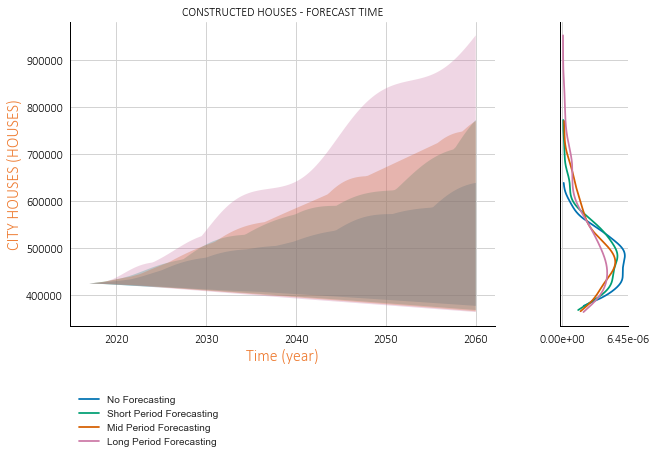

In [38]:
sns.set_style("whitegrid", {"axes.edgecolor": 'black', "grid.color": 'lightgrey'})

legend = True

outcome = 'Constructed Houses'
fig, axes = envelopes(results, 
                  outcomes_to_show=outcome, 
                  group_by='Forecast Time Forecasting Policy',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_Ftime,
                  fill=True)
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Constructed Houses - Forecast Time'), color = 'Black')

if save:
    plt.savefig(wd1 + '\\20170828_1000runs_GENERALnalysis_CityPop_Ftime_Intervention_Envelopes.png', dpi=300)

#6.1.3. Constructed Business

Low Urbanization
Medium Urbanization
High Urbanization


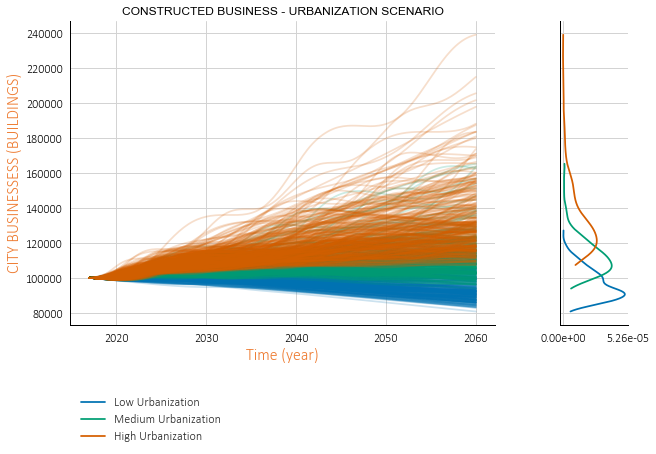

In [40]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Constructed Business'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Urbanization',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_urb,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Constructed Business - Urbanization Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_Business_Urbanisation_Intervention_0_Lines.png', dpi=300)

Low Economic Growth
Medium Economic Growth
High Economic Growth


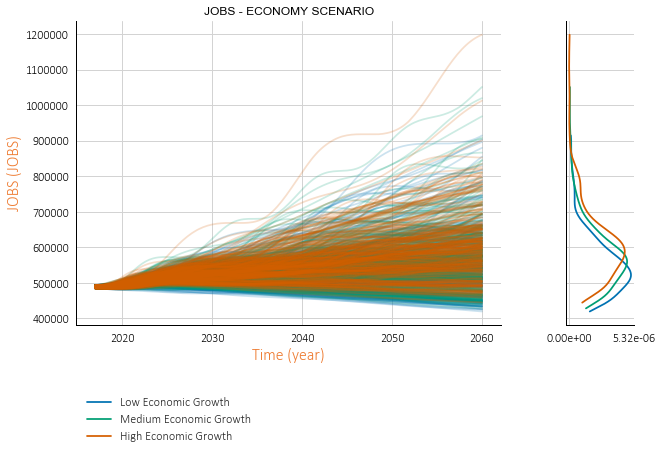

In [41]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Jobs'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Economy',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_eco,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Jobs - Economy Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_Jobs_Economy_Intervention_0_Lines.png', dpi=300)

ReActive
ProActive
Constructed Business


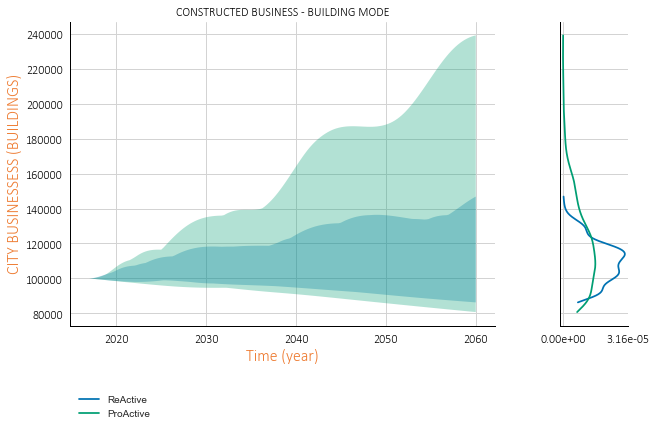

In [42]:
sns.set_style("whitegrid", {"axes.edgecolor": 'black', "grid.color": 'lightgrey'})

legend = True

outcome = 'Constructed Business'
fig, axes = envelopes(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Building Mode',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_mode,
                  fill=True)
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Constructed Business - Building Mode'), color = 'Black')

if save:
    plt.savefig(wd1 + '\\20170828_1000runs_GENERALnalysis_Business_buildmode_Intervention_Envelopes.png', dpi=300)

No Forecasting
Short Period Forecasting
Mid Period Forecasting
Long Period Forecasting
Constructed Business


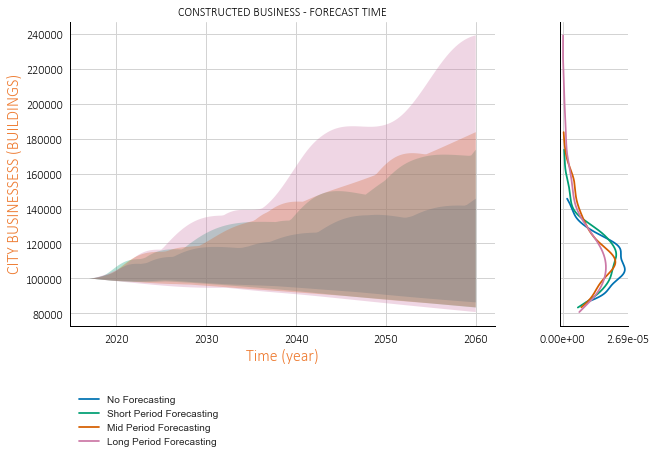

In [43]:
sns.set_style("whitegrid", {"axes.edgecolor": 'black', "grid.color": 'lightgrey'})

legend = True

outcome = 'Constructed Business'
fig, axes = envelopes(results, 
                  outcomes_to_show=outcome, 
                  group_by='Forecast Time Forecasting Policy',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_Ftime,
                  fill=True)
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Constructed Business - Forecast Time'), color = 'Black')

if save:
    plt.savefig(wd1 + '\\20170828_1000runs_GENERALnalysis_Business_Ftime_Intervention_Envelopes.png', dpi=300)

#6.1.4. City Area to Total Area

Low Urbanization
Medium Urbanization
High Urbanization


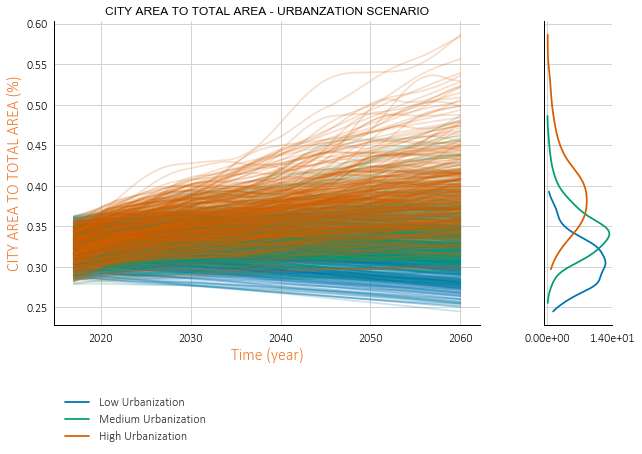

In [10]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'City Area to Total Area'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Urbanization',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_urb,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('City Area to Total Area - Urbanzation Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_CityArea_Urbanisation_Intervention_0_Lines.png', dpi=300)

## #6.2 Harbour

#6.2.1 Harbour Distribution

Low Economic Growth
Medium Economic Growth
High Economic Growth
MTPA Distributed in Harbour


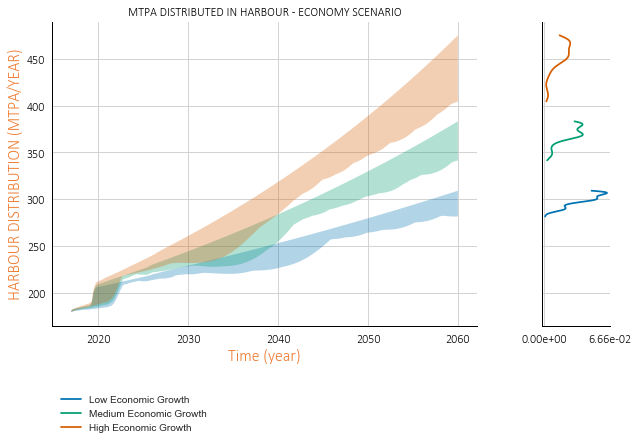

In [11]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'MTPA Distributed in Harbour'
fig, axes = envelopes(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Economy',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_eco,
                  fill = True,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('MTPA Distributed in Harbour - Economy Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_HarbourDist_Economy_Intervention_0_Envelopes.png', dpi=300)

Low Urbanization
Medium Urbanization
High Urbanization


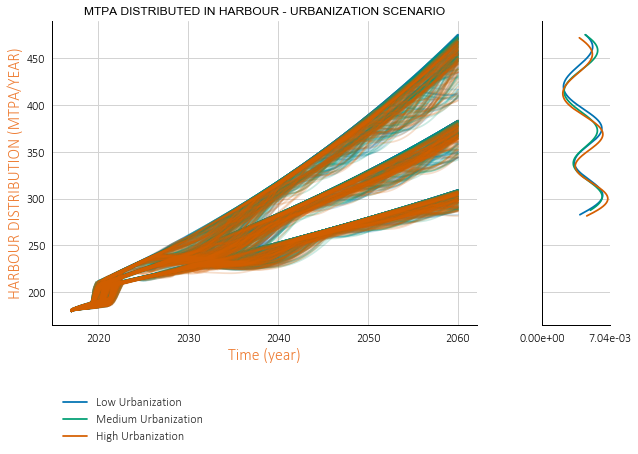

In [50]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'MTPA Distributed in Harbour'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Urbanization',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_urb,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('MTPA Distributed in Harbour - Urbanization Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_HarbourDist_Urb_Intervention_0_Lines.png', dpi=300)

#6.2.2 Harbour Area

Low Economic Growth
Medium Economic Growth
High Economic Growth


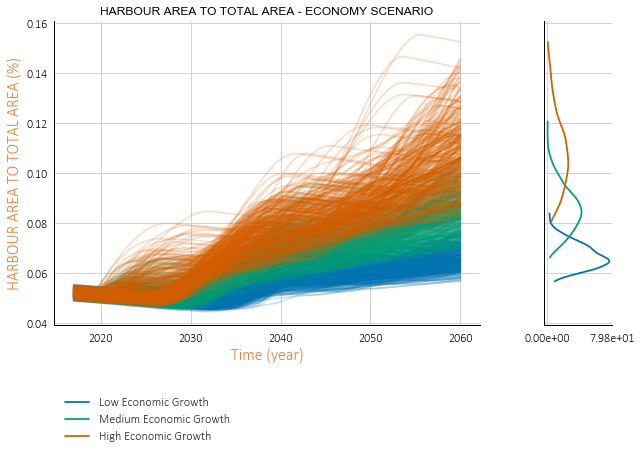

In [51]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Harbour Area to Total Area'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Economy',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_eco,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Harbour Area to Total Area - Economy Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_HarbourArea_Economy_Intervention_0_Lines.png', dpi=300)

Low Innovation
Medium Innovation
High Innovation


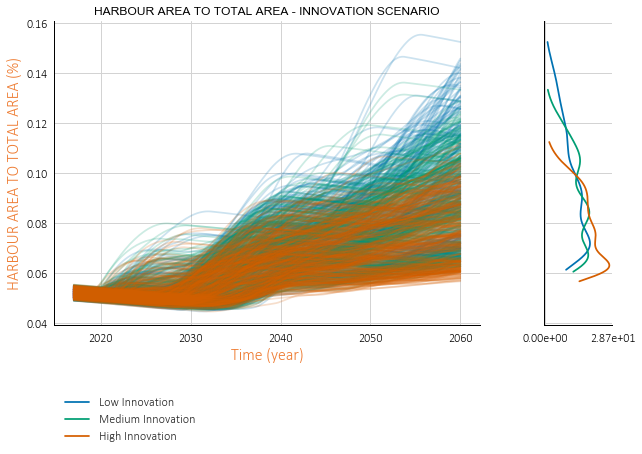

In [52]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Harbour Area to Total Area'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Innovation',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_inno,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Harbour Area to Total Area - Innovation Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_HarbourArea_Inno_Intervention_0_Lines.png', dpi=300)

## #6.3 Area 

#6.3.1 Available Area

No Nature Preservation
Nature Preservation


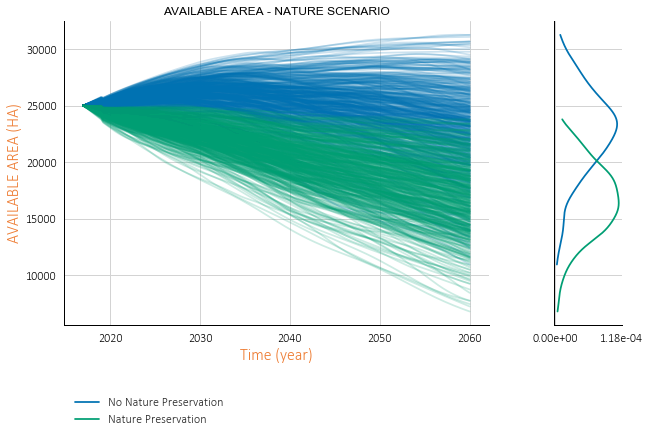

In [8]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Available Area'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Nature Scenario',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_nature,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Available Area - Nature Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_AvlArea_Nature_Intervention_0_Lines.png', dpi=300)

Low Urbanization
Medium Urbanization
High Urbanization


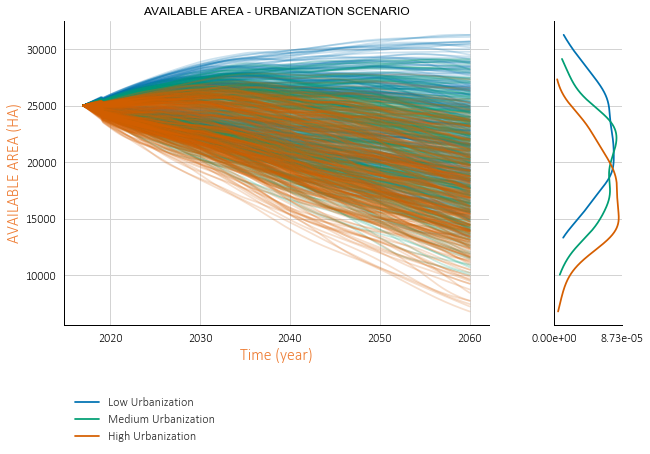

In [54]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Available Area'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Urbanization',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_urb,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Available Area - Urbanization Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_AvlArea_Urb_Intervention_0_Lines.png', dpi=300)

Low Innovation
Medium Innovation
High Innovation
Available Area


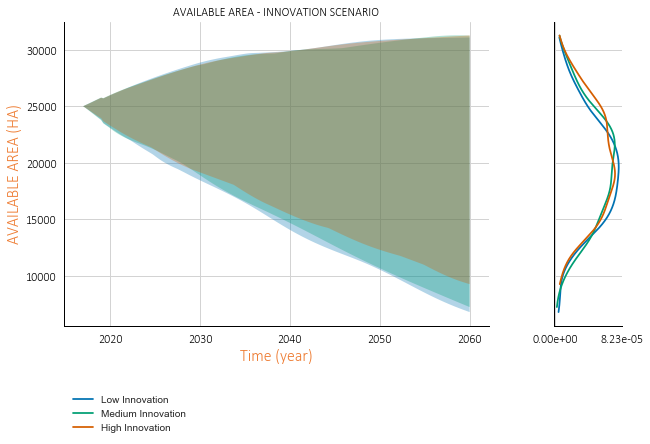

In [56]:
sns.set_style("whitegrid", {"axes.edgecolor": 'black', "grid.color": 'lightgrey'})

legend = True

outcome = 'Available Area'
fig, axes = envelopes(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Innovation',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_inno,
                  fill=True)
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Available Area - Innovation Scenario'), color = 'Black')

if save:
    plt.savefig(wd1 + '\\20170828_1000runs_GENERALnalysis_AvlArea_Inno_Intervention_Envelopes.png', dpi=300)

GL Scenario
GH Scenario
WL Scenario
WH Scenario


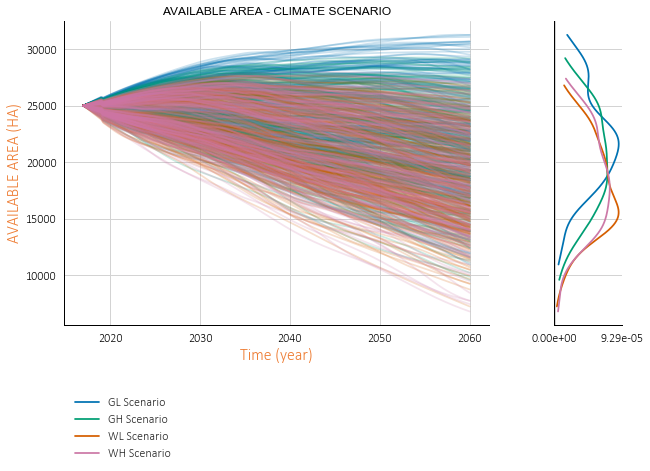

In [57]:
sns.set_style("whitegrid", {"axes.edgecolor": 'black', "grid.color": 'lightgrey'})

legend = True

outcome = 'Available Area'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Climate Scenario',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_climate)
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Available Area - Climate Scenario'), color = 'Black')

if save:
    plt.savefig(wd1 + '\\20170828_1000runs_GENERALnalysis_AvlArea_Climate_Intervention_Lines.png', dpi=300)

## #6.4 Local Economy

#6.3.1 Local Economic Growth

Low Economic Growth
Medium Economic Growth
High Economic Growth


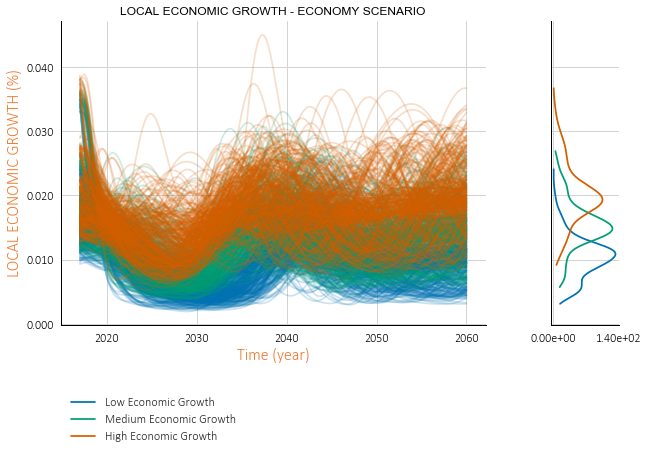

In [58]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Local Economic Growth'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Economy',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_eco,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Local Economic Growth - Economy Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_LocalEcoGrowth_Eco_Intervention_0_Lines.png', dpi=300)

#6.3.2 Local Economy

Low Economic Growth
Medium Economic Growth
High Economic Growth


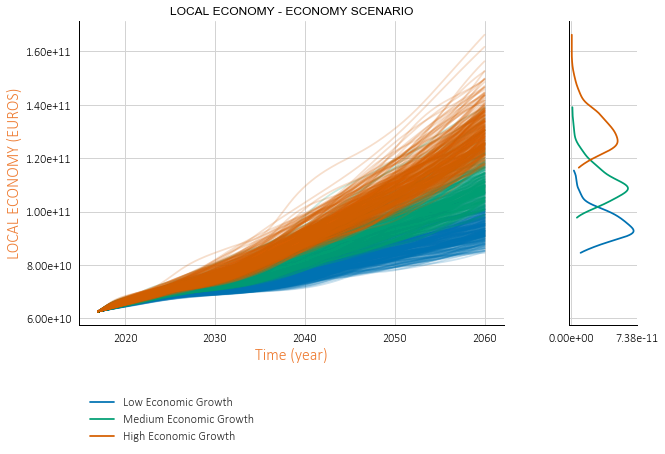

In [12]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Local Economy'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Economy',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_eco,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Local Economy - Economy Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_LocalEco_Eco_Intervention_0_Lines.png', dpi=300)

Low Urbanization
Medium Urbanization
High Urbanization


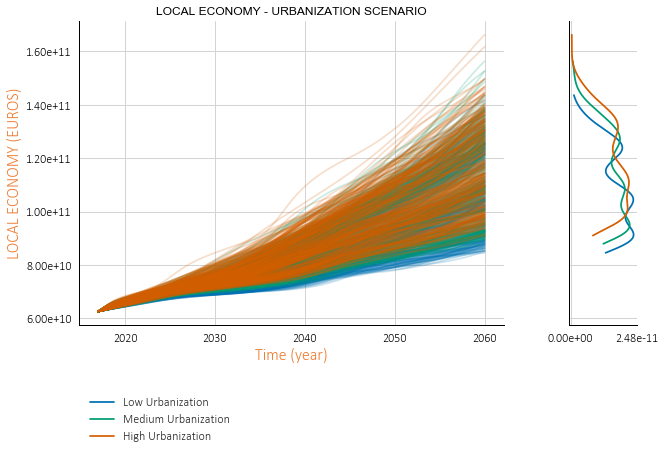

In [59]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Local Economy'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Urbanization',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_urb,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Local Economy - Urbanization Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_LocalEco_Urb_Intervention_0_Lines.png', dpi=300)

Low Innovation
Medium Innovation
High Innovation


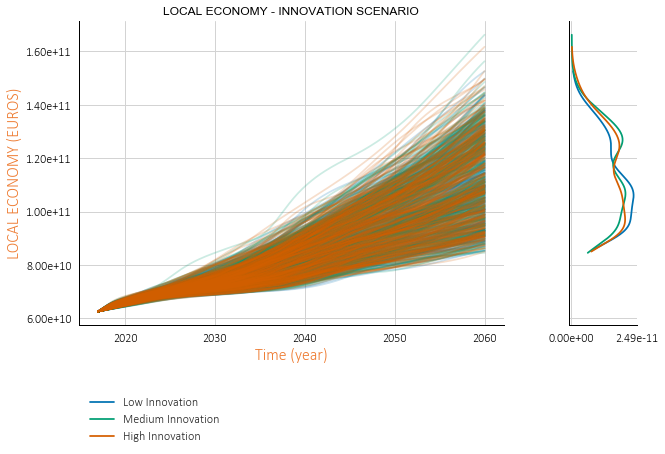

In [60]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Local Economy'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Innovation',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_inno,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Local Economy - Innovation Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_LocalEco_Inno_Intervention_0_Lines.png', dpi=300)

GL Scenario
GH Scenario
WL Scenario
WH Scenario


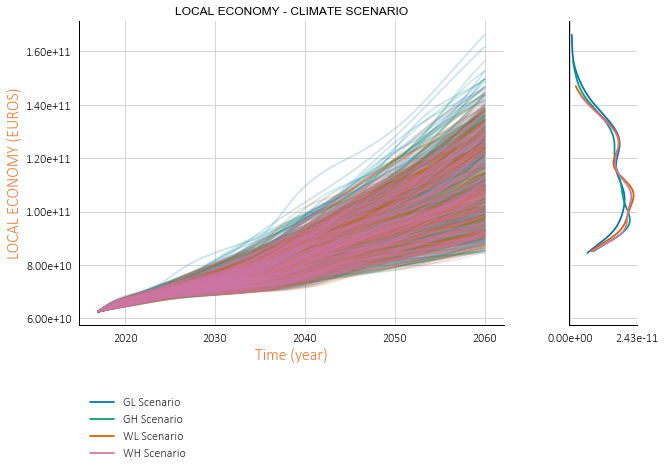

In [61]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Local Economy'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Climate Scenario',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_climate,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Local Economy - Climate Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_LocalEco_Climate_Intervention_0_Lines.png', dpi=300)

## #6.5 Road

#6.5.1 Road System IC Factor

Low Urbanization
Medium Urbanization
High Urbanization


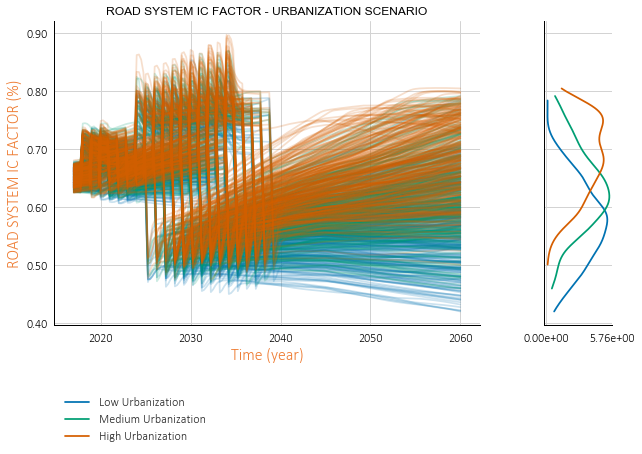

In [62]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Road System IC Factor'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Urbanization',
                  density = 'kde',
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_urb,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Road System IC Factor - Urbanization Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_RoadIC_Urb_Intervention_0_Lines.png', dpi=300)

Low Innovation
Medium Innovation
High Innovation


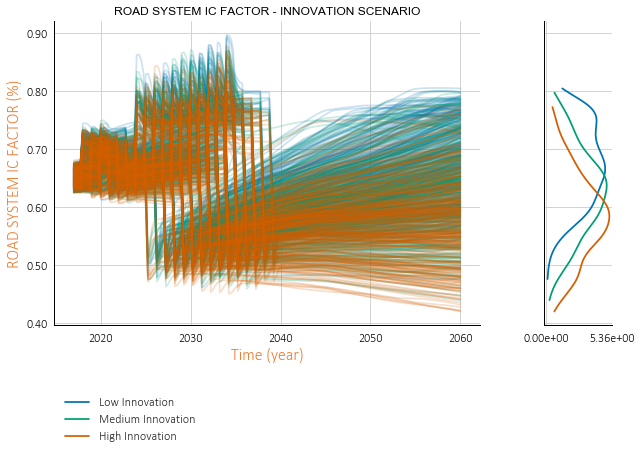

In [63]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Road System IC Factor'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Innovation',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_inno,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Road System IC Factor - Innovation Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_RoadIC_Inno_Intervention_0_Lines.png', dpi=300)

GL Scenario
GH Scenario
WL Scenario
WH Scenario


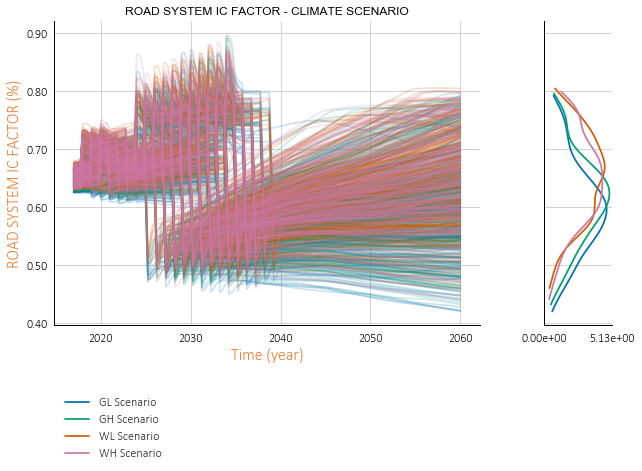

In [64]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Road System IC Factor'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Climate Scenario',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_climate,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Road System IC Factor - Climate Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_RoadIC_Climate_Intervention_0_Lines.png', dpi=300)

## #6.6 Lock

#6.6.1 Lock System IC Factor

Low Economic Growth
Medium Economic Growth
High Economic Growth


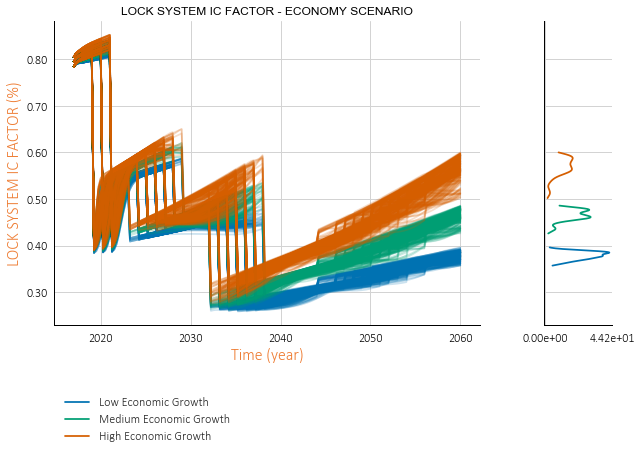

In [67]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Lock System IC Factor'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Economy',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_eco,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Lock System IC Factor - Economy Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_LockIC_Eco_Intervention_0_Lines.png', dpi=300)

Low Innovation
Medium Innovation
High Innovation


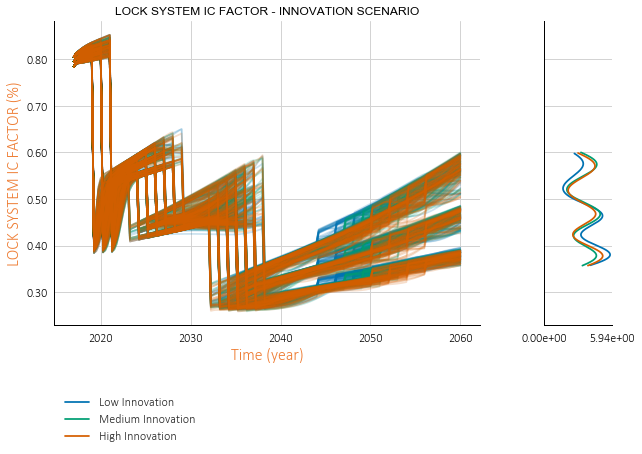

In [68]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Lock System IC Factor'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Innovation',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_inno,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Lock System IC Factor - Innovation Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_LockIC_Inno_Intervention_0_Lines.png', dpi=300)

GL Scenario
GH Scenario
WL Scenario
WH Scenario


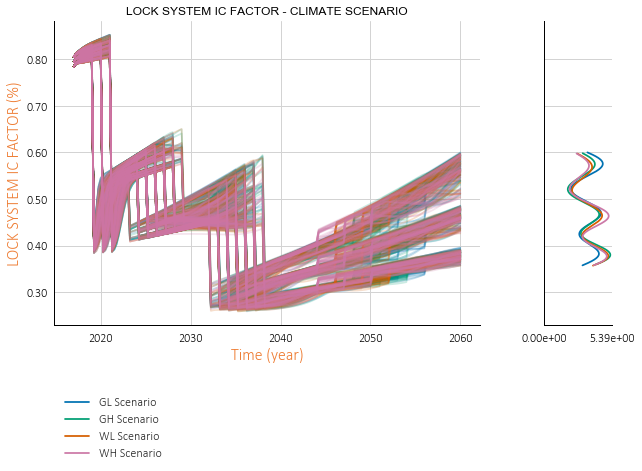

In [69]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Lock System IC Factor'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Climate Scenario',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_climate,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Lock System IC Factor - Climate Scenario'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_GENERALAnalysis_LockIC_Climate_Intervention_0_Lines.png', dpi=300)